# Order Statistics

## Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import beta, norm

plt.rcParams.update({"text.usetex": True, 'font.size': 18, 'font.family': 'serif'})

np.random.seed(1337)

In [8]:
ROUNDS = 100_000

## Theory: Order Statistics

Let $(X_1,...,X_N)$ be a sample of $N$ draws. The notation $(X_{(1)}, ..., X_{(N)})$ denotes the *sorted* vector of the $N$ draws. That is, $X_{(1)}$ is the minimum, $X_{(n)}$ is the maximums, and $X_{(k)}$ is the $k$'th smallest, which we call the $k$'th order statistic.

In auction theory, it becomes useful to think of the distribution of the $k$'th order statistic. Just like the sample average, $ \bar{X} \equiv N^{-1} \sum_{i=1}^N X_i$, the $k$'th order statistic is just a function of our $n$ stochastic variables. Since any function of a stochastic variable is itself a stochastic variable, the $k$'th order statistic has a distribution, which will have a mean, a std.dev., etc.

## Uniform Distribution

Let's take `ROUNDS` draws of $N$ independent values

In [9]:
N = 17000  # Network size
K = 20  # k-bucket size
u = np.random.uniform(0, 1, (ROUNDS, N))

Let's plot the distribution of each of the N independent values:

Text(0, 0.5, 'Density')

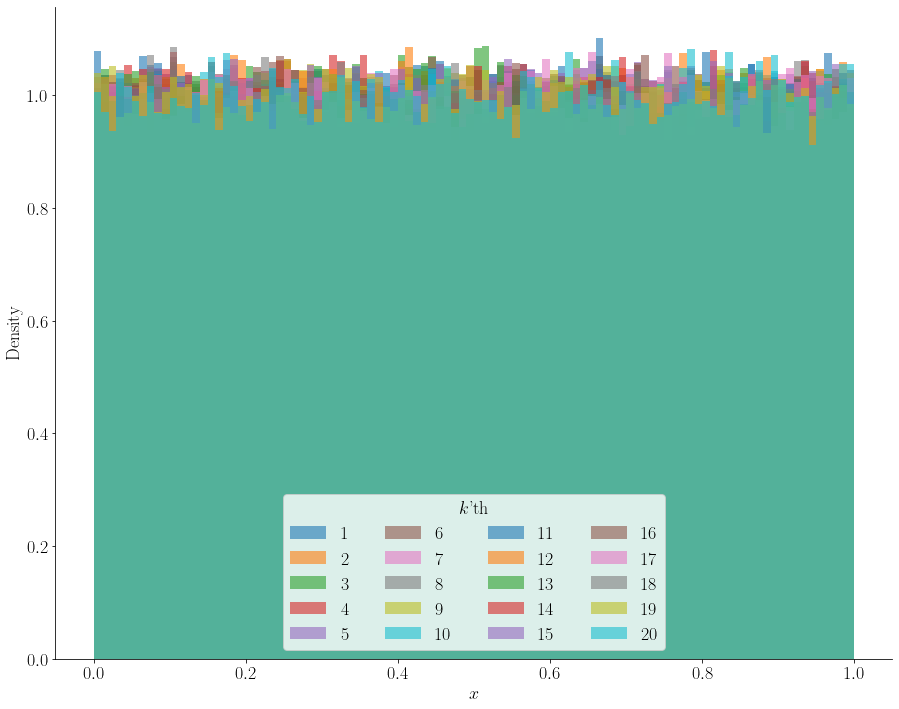

In [10]:
fig, ax = plt.subplots(figsize=[15, 12])

for k in range(K):
    ax.hist(u[:, k], density=True, alpha=0.6, label=f'${k + 1}$', bins=100)
ax.legend(loc='lower center', title="$k$'th", ncol=4); sns.despine()
ax.grid(False); ax.set_xlabel('$x$'); ax.set_ylabel('Density')

## Probability Density

In [12]:
u_sort = np.sort(u)

(-0.0001, 0.002)

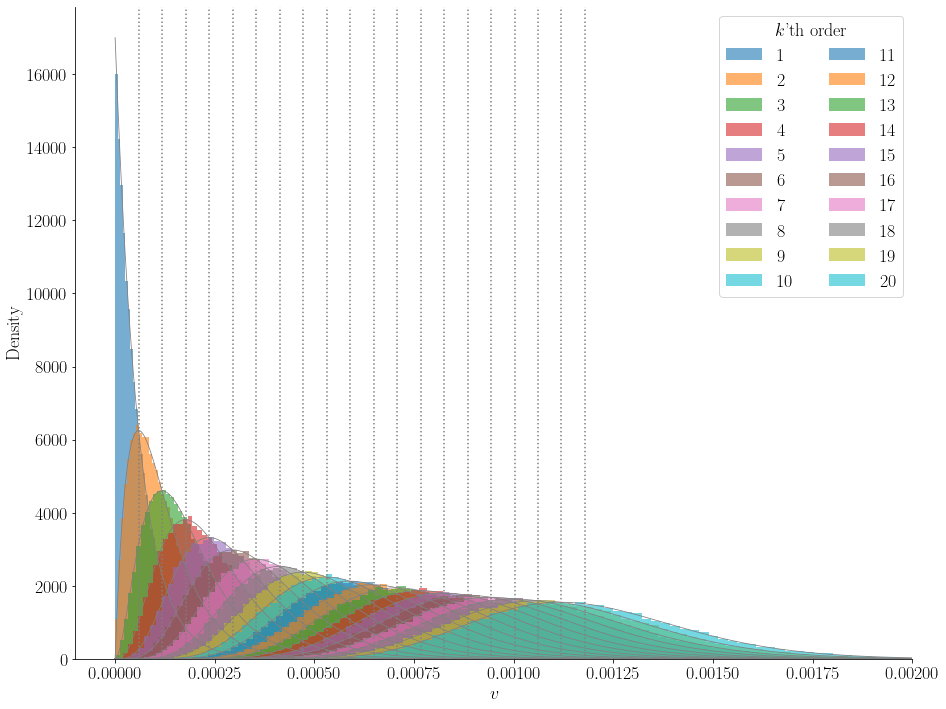

In [15]:
fig, ax = plt.subplots(figsize=[15, 12])
for k in range(K):
    ax.hist(u_sort[:, k], density=True, alpha=0.6, label=f'${k + 1}$', bins=100)
    ax.axvline(u_sort[:, k].mean(), color='gray', linestyle=':')
    xs = np.linspace(0, 0.002, 1_000)
    ax.plot(xs, beta.pdf(xs, a=(k + 1), b=N - (k + 1) + 1), color='gray', linestyle='-', linewidth=0.8)
ax.legend(loc='best', title="$k$'th order", ncol=2); sns.despine()
ax.set_xlabel('$v$'); ax.set_ylabel('Density'); ax.set_xlim(-0.0001, 0.002)


## Cumulative Probability Distribution

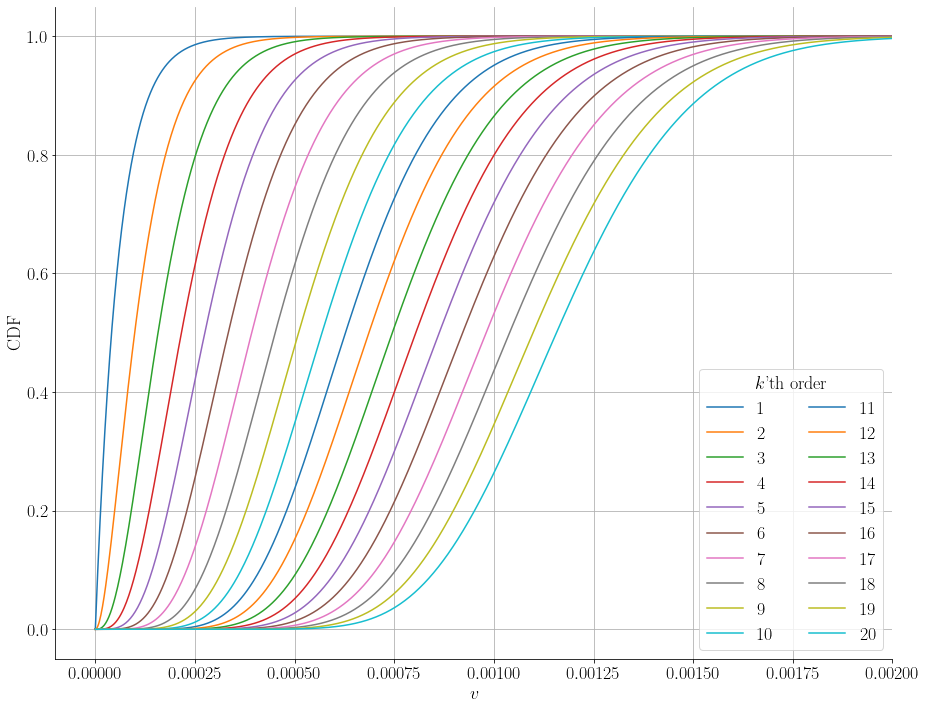

In [17]:
fig, ax = plt.subplots(figsize=[15, 12])
for k in range(K):
    xs = np.linspace(0, 0.002, 1_000)
    ax.plot(xs, beta.cdf(xs, a=(k + 1), b=N - (k + 1) + 1), label=f'${k + 1}$')
ax.legend(loc='best', title="$k$'th order", ncol=2); sns.despine()
ax.set_xlabel('$v$'); ax.set_ylabel('CDF'); ax.set_xlim(-0.0001, 0.002); ax.grid()

In [18]:
X = 0.0005
print(f"Point: {X}")
for k in range(1, K + 1):
    print(f"--- k={k} ---")
    cdf = beta.cdf(X, a=k, b=N - k + 1)
    print(f"CDF = {cdf:.5f}")
    print(f"The probability that the {k}-th order statistic is lower than {X} is {100 * cdf:.2f} %.")


Point: 0.0005
--- k=1 ---
CDF = 0.99980
The probability that the 1-th order statistic is lower than 0.0005 is 99.98 %.
--- k=2 ---
CDF = 0.99807
The probability that the 2-th order statistic is lower than 0.0005 is 99.81 %.
--- k=3 ---
CDF = 0.99073
The probability that the 3-th order statistic is lower than 0.0005 is 99.07 %.
--- k=4 ---
CDF = 0.96992
The probability that the 4-th order statistic is lower than 0.0005 is 96.99 %.
--- k=5 ---
CDF = 0.92569
The probability that the 5-th order statistic is lower than 0.0005 is 92.57 %.
--- k=6 ---
CDF = 0.85047
The probability that the 6-th order statistic is lower than 0.0005 is 85.05 %.
--- k=7 ---
CDF = 0.74389
The probability that the 7-th order statistic is lower than 0.0005 is 74.39 %.
--- k=8 ---
CDF = 0.61445
The probability that the 8-th order statistic is lower than 0.0005 is 61.45 %.
--- k=9 ---
CDF = 0.47691
The probability that the 9-th order statistic is lower than 0.0005 is 47.69 %.
--- k=10 ---
CDF = 0.34701
The probabilit

## Combined Probabilities

In [26]:
X = 0.0001
k = 1
cdf_1 = beta.cdf(X, a=k, b=N - k + 1)
print(f"Probability that the 1st order statistic is less than {X} is {100 * cdf_1:.2f} %")

k = 2
cdf_2 = beta.cdf(X, a=k, b=N - k + 1)
print(f"Probability that the 2nd order statistic is less than {X} is {100 * cdf_2:.2f} %")
print(f"Probability that the 1st and 2nd order statistics are less than {X} is {100 *cdf_1 * cdf_2:.2f} %")

k = 3
cdf_3 = beta.cdf(X, a=k, b=N - k + 1)
print(f"Probability that the 1st, 2nd, and 3rd order statistics are less than {X} is {100 *cdf_1 * cdf_2 * cdf_3:.2f} %")


Probability that the 1st order statistic is less than 0.0001 is 81.73 %
Probability that the 2nd order statistic is less than 0.0001 is 50.68 %
Probability that the 1st and 2nd order statistics are less than 0.0001 is 41.42 %
Probability that the 1st, 2nd, and 3rd order statistics are less than 0.0001 is 10.06 %


Text(0.5, 1.0, 'Probability that the first $k=20$ order statistics are less than $v$')

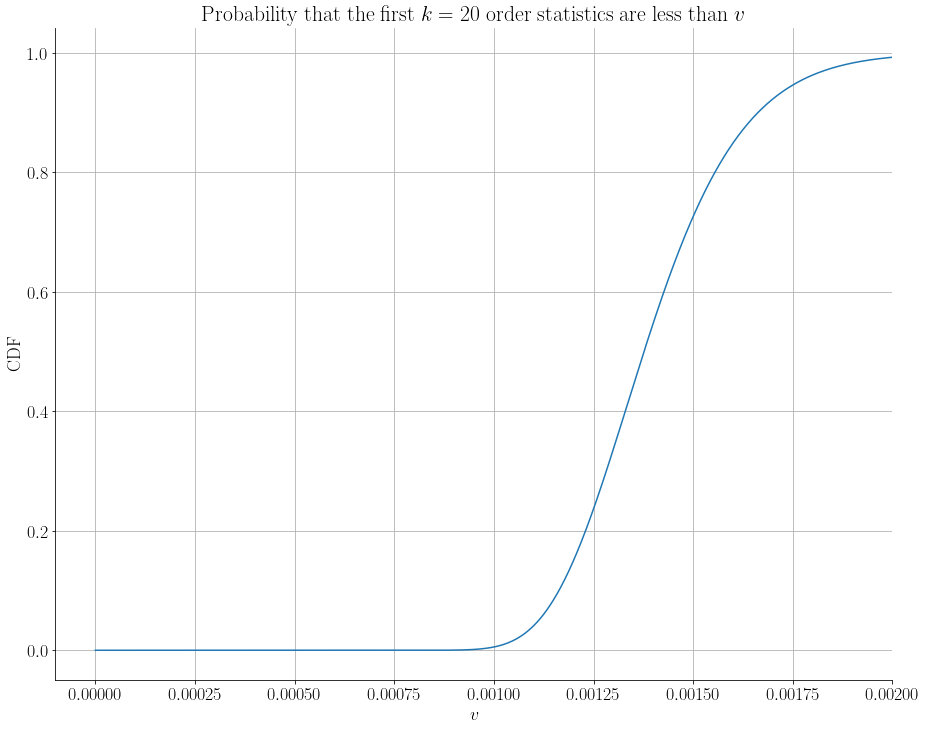

In [21]:
fig, ax = plt.subplots(figsize=[15, 12])

xs = np.linspace(0, 0.002, 1_000)
cdfs = np.ones(xs.shape[0])
for k in range(1, K + 1):
    cdfs *= beta.cdf(xs, a=k, b=N - k + 1)
ax.plot(xs, cdfs); sns.despine()
ax.set_xlabel('$v$'); ax.set_ylabel('CDF'); ax.set_xlim(-0.0001, 0.002); ax.grid()
ax.set_title("Probability that the first $k=20$ order statistics are less than $v$")

495.79571635329023


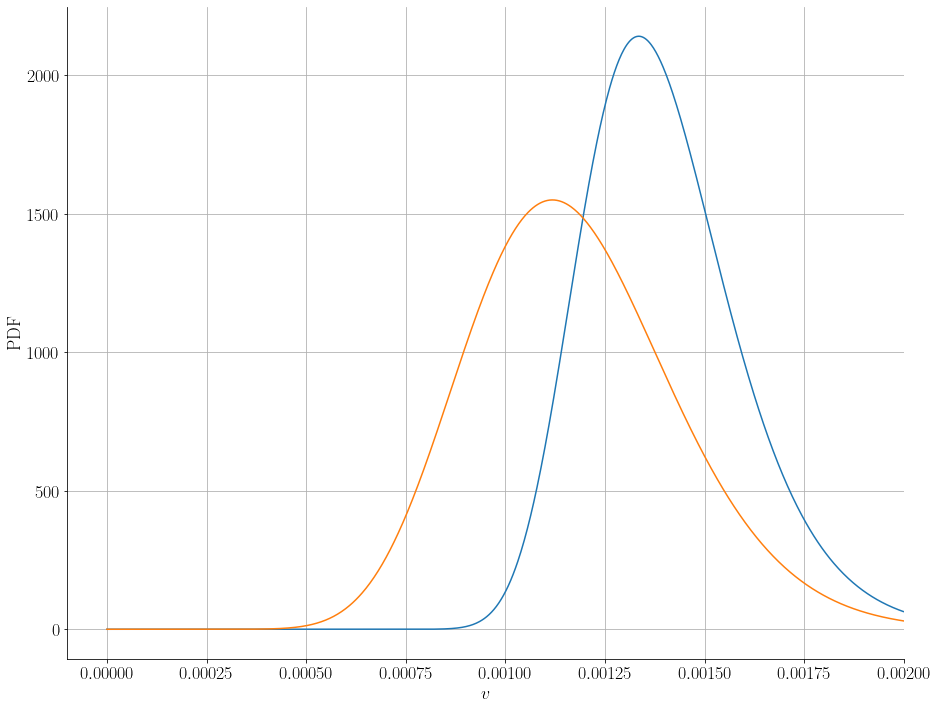

In [24]:
dx = xs[1] - xs[0]
gradient = np.gradient(cdfs, dx)
print(np.mean(gradient))

fig, ax = plt.subplots(figsize=[15, 12])

ax.plot(xs, gradient); sns.despine()
ax.plot(xs, beta.pdf(xs, a=20, b=N-20+1));
ax.set_xlabel('$v$'); ax.set_ylabel('PDF'); ax.set_xlim(-0.0001, 0.002); ax.grid()

Text(0.5, 1.0, 'Probability that the first $k=20$ order statistics are less than $v$')

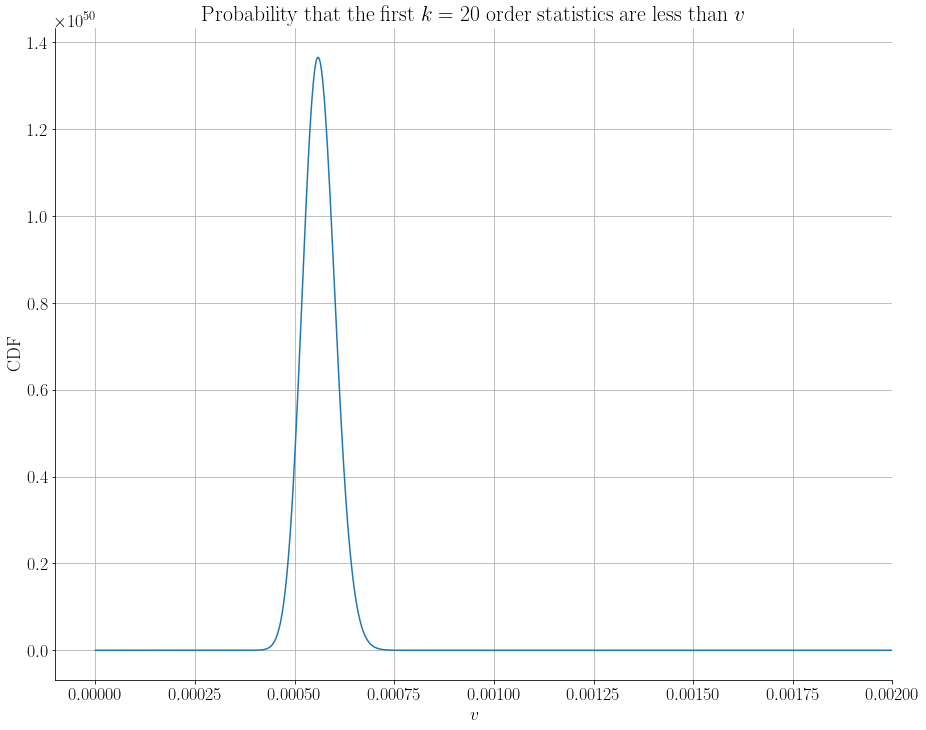

In [23]:
fig, ax = plt.subplots(figsize=[15, 12])

xs = np.linspace(0, 0.002, 1_000)
pdfs = np.ones(xs.shape[0])
for k in range(1, K + 1):
    pdfs *= beta.pdf(xs, a=k, b=N - k + 1)
ax.plot(xs, pdfs); sns.despine()
ax.set_xlabel('$v$'); ax.set_ylabel('CDF'); ax.set_xlim(-0.0001, 0.002); ax.grid()
ax.set_title("Probability that the first $k=20$ order statistics are less than $v$")